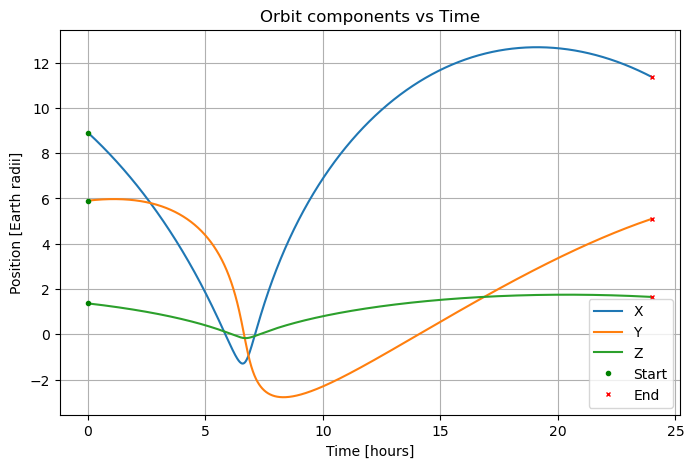

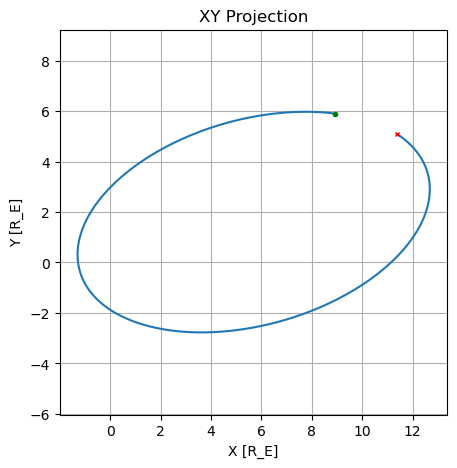

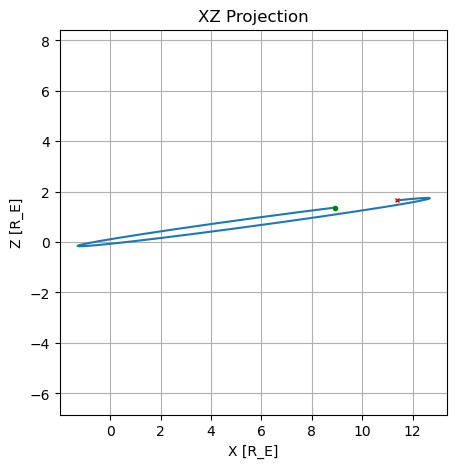

In [4]:
# importing packages
import numpy as np
import matplotlib.pyplot as plt

# Global Values 
RE_KM = 6371.0  # Earth radius in km

# Function to read file
def read_orbit_file(filename):
    """
    Load the THEMIS-D data file.
    Returns:
        t_sec : array of elapsed time in seconds
        x_m, y_m, z_m : position components in meters
    """
    # Theses are the lists created for the data in the file 
    times_sec = []
    Xkm, Ykm, Zkm = [], [], []
    
    with open(filename, 'r') as f:
        for line in f:
            parts = line.strip().split()
            # Skip any non-data lines by skipping any line that does not contain more than six columns and
            # that the first column data does not contain any letters, which is a title 
            # columns
            # 0=year, 1=day, 2=time, 3=x, 4=y, 5=z
            if len(parts) < 6 or not parts[0].isdigit():
                # continue is the function used to skip the lines that fulfill this if statement
                continue
            # Parse time: hh:mm:ss
            # map function applies a function to a collective of numbers and will convert our string to an intiger
            h, m, s = map(int, parts[2].split(':'))
            # Converting everything into seconds 
            tsec = h*3600 + m*60 + s
            times_sec.append(tsec)
            # Positions in km 
            # Creates lists of all the coordinates 
            # transforms strings into a float
            Xkm.append(float(parts[-3]))
            Ykm.append(float(parts[-2]))
            Zkm.append(float(parts[-1]))
    
    t_sec = np.array(times_sec)  # np array of times in seconds

    # converts the list to an array in meters
    x_m = np.array(Xkm) * 10e3
    y_m = np.array(Ykm) * 10e3
    z_m = np.array(Zkm) * 10e3

    # Returns the arrays created 
    return t_sec, x_m, y_m, z_m

def convert_m_to_re(value):


# Function for plot 1 
def plot_orbit_components(t_H, xRE, yRE, zRE):
    plt.figure(figsize=(8,5))
    plt.plot(t_H, xRE, label='X', linestyle='-')
    plt.plot(t_H, yRE, label='Y', linestyle='-')
    plt.plot(t_H, zRE, label='Z', linestyle='-')

     # mark start points (green circle)
    plt.plot(t_H[0], xRE[0], 'go', markersize=3, label='Start')
    plt.plot(t_H[0], yRE[0], 'go', markersize=3)
    plt.plot(t_H[0], zRE[0], 'go', markersize=3)

    # mark end points (red X)
    plt.plot(t_H[-1], xRE[-1], 'rx', markersize=3, label='End')
    plt.plot(t_H[-1], yRE[-1], 'rx', markersize=3)
    plt.plot(t_H[-1], zRE[-1], 'rx', markersize=3)
    
    plt.xlabel("Time [hours]")
    plt.ylabel("Position [Earth radii]")
    plt.title("Orbit components vs Time")
    plt.legend()
    plt.grid(True)
    plt.show()

    # XY projection
    plt.figure(figsize=(5,5))
    plt.plot(xRE, yRE)

     # mark start points (green circle)
    plt.plot(xRE[0], yRE[0], 'go', markersize=3, label='Start')

    # mark end points (red X)
    plt.plot(xRE[-1], yRE[-1], 'rx', markersize=3, label='End')
    
    plt.xlabel("X [R_E]")
    plt.ylabel("Y [R_E]")
    plt.title("XY Projection")
    plt.axis('equal')
    plt.grid(True)
    plt.show()
    
    # XZ projection
    plt.figure(figsize=(5,5))
    plt.plot(xRE, zRE)

     # mark start points (green circle)
    plt.plot(xRE[0], zRE[0], 'go', markersize=3, label='Start')

    # mark end points (red X)
    plt.plot(xRE[-1], zRE[-1], 'rx', markersize=3, label='End')
    
    plt.xlabel("X [R_E]")
    plt.ylabel("Z [R_E]")
    plt.title("XZ Projection")
    plt.axis('equal')
    plt.grid(True)
    plt.show()


# TODO: have file path be not hard coded
file_path = "C:\\Users\\spenc\\PycharmProjects\\PHYS481_Assignment_1_2\\Data_Assignment_1 481.txt"
t_H, xRE, yRE, zRE = read_orbit_file(file_path)
plot_orbit_components(t_H, xRE, yRE, zRE)





Yeah it seems like a plausable trajectory and looks like something that a sattellite could accomplish in orbit

When we are looking for the kinetic energy per unit mass. It is like doing KE/m= [(1/2)m(v^2)]/m

The same thing would be for the potential energy, even if the mass of our satellite is much smaller than that of the Earth and would have made very little difference. PE=-G/r (negative due to attraction and not repulsion) 

r = (x^2 + y^2 + z^2)^1/2

Plot all the energies as a function of time. PE(t), KE(t), PE(t)+KE(t) 

Plot total Energy as a function of time PE(t)+KE(t) 




In [1]:
# Forward finite difference
def forward_difference(f, x):
    """
    Calculates the forward finite difference of the function f(x), returning its derivative f_prime(x),
    where f depends on the independent variable x.

    This function assumes that inputs f and x are numpy arrays of length n
    The returned list drops both edge points (first and last element) and thus is of length n-2
    """
    f_prime = (f[1:] - f[0:-2])/(x[1:]-x[0:-2])
    return f_prime[1:]

In [ ]:
# Question 2
ME = 5.8722e24  # mass of the earth in kg
G = 6.6743e-11  # gravitational constant in m^3/kg*s^2

def velocity_calc(x, t, numeric_derivative):
    """
    Calculates the velocity from a passed coordinate x using a given model for a numerical derivative.
    Note that numeric derivatives will drop some number of edge points, meaning v will be a smaller array than x.

    :param x: coordinate to find velocity of as a numpy array (ex: x, y, or z)
    :param t: time associated with x coordinate
    :param numeric_derivative: Reference to numerical derivative model used to calculate the velocity from position.
    :return v: velocity in x as a numpy array
    """
    v = numeric_derivative(x, t)
    return v

def kinetic_energy(vx, vy, vz):
    """function that calculates kinetic energy per unit mass"""
    v_magnitude_squared = (vx**2) + (vy**2) + (vz**2)
    return 0.5 * v_magnitude_squared

def simple_potential_energy(x, y, z):
    """
    calculates gravitational potential energy assuming a 1/r dependence from an objects cartesian coordinates
    """
    r = np.sqrt((x**2) + (y**2) + (z**2))
    return -(G*ME)/r

def total_energy(ke, pe):
    """returns total energy from kinetic energy (ke) and potential energy (pe)"""
    return ke + pe

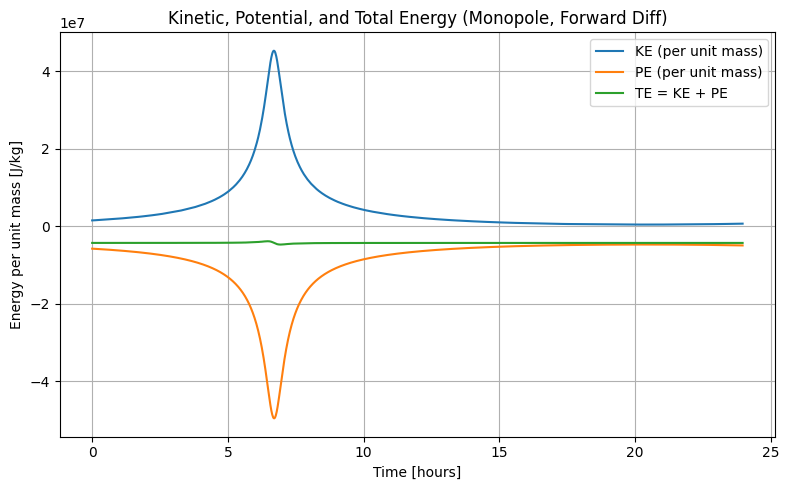

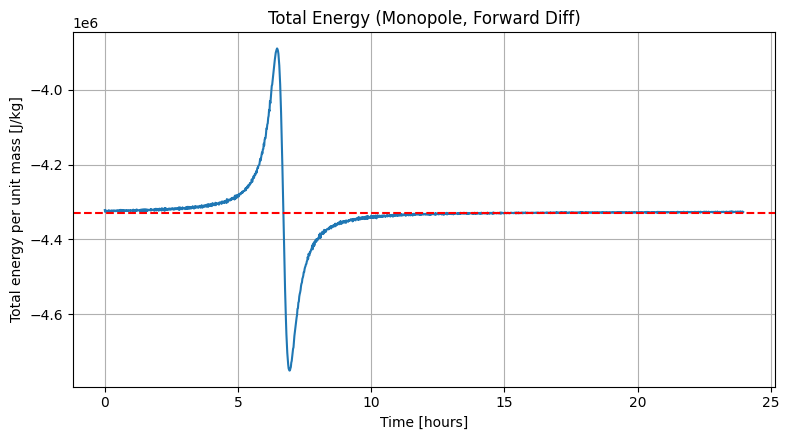

In [12]:
# ==== Task 2: Energy with forward finite difference (monopole φ = -μ/r) ====

# --- Physical constants (≥ 5 significant digits) ---
RE_M  = 6_371_000.0                 # Earth mean radius [m]
G     = 6.6743e-11                  # Gravitational constant [m3 kg-1 s-2]
EM    = 5.9722e24                   # Mass of the Earth [kg]
MU    = 3.986004418e14              # Earth's GM [m^3/s^2]





def forward_diff(t_H, arr):
    """
    Forward finite difference of 'arr' with respect to 'time_hours'.
    Drops the last point (length N-1).
    time_hours: 1D array (monotone increasing), in hours
    arr:        1D array of same length as time_hours
    Returns:
        t_out_hours : time aligned to the left (t[i]) -> length N-1
        dadt        : forward derivative d(arr)/dt in [arr units per second]
    """
    t_H        = np.asarray(t_H)
    arr        = np.asarray(arr)
    dt_sec     = np.diff(t_H) * 3600.0        # convert hour -> second
    # Guard against any zero/negative dt (shouldn't happen for clean data):
    valid      = dt_sec > 0.0
    # Left-aligned times for the derivative:
    t_out      = t_H[:-1][valid]
    dadt       = (np.diff(arr)[valid]) / dt_sec[valid]
    return t_out, dadt





def compute_energy_monopole(t_H, x_re, y_re, z_re):
    """
    Compute KE, PE, TE per unit mass using forward difference for velocity
    and φ = -μ/r (monopole). Position inputs are in Earth radii.
    Returns (t_kepe_hours, KE, PE, TE), all length N-1 after differencing.
    Units: KE, PE, TE in [J/kg] = [m^2/s^2].
    """
    # Convert position from RE to meters
    xRE = np.asarray(x_re) * RE_M
    yRE = np.asarray(y_re) * RE_M
    zRE = np.asarray(z_re) * RE_M

    v_x = xRE.copy()
    v_y = yRE.copy()
    v_z = zRE.copy()

    # Forward differences for velocity components
    t_vx, vx = forward_diff(t_H, v_x)
    t_vy, vy = forward_diff(t_H, v_y)
    t_vz, vz = forward_diff(t_H, v_z)

    # Intersect the valid time bases (they should match, but be safe)
    # Here they’re identical by construction; we’ll just use t_vx.
    t_out = t_vx

    # Speed^2 and KE per unit mass
    v2 = vx*vx + vy*vy + vz*vz
    KE = 0.5 * v2

    # Position magnitudes aligned to the *left* to match forward differencing
    # (i.e., use r(t_i) to pair with v(t_i) from forward diff)
    r = np.sqrt(xRE[:-1]**2 + yRE[:-1]**2 + zRE[:-1]**2)

    # Potential energy per unit mass (monopole)
    PE = -MU / r

    # Total energy per unit mass
    TE = KE + PE

    return t_out, KE, PE, TE






def q2_plots(t_H, KE, PE, TE):
    """Plot KE, PE, TE on the same figure (vs hours)."""
    plt.figure(figsize=(8,5))
    plt.plot(t_H, KE, label='KE (per unit mass)')
    plt.plot(t_H, PE, label='PE (per unit mass)')
    plt.plot(t_H, TE, label='TE = KE + PE')
    plt.xlabel('Time [hours]')
    plt.ylabel('Energy per unit mass [J/kg]')
    plt.title('Kinetic, Potential, and Total Energy (Monopole, Forward Diff)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    """Plot total energy per unit mass alone (vs hours)."""
    plt.figure(figsize=(8,4.5))
    plt.plot(t_H, TE)
    plt.axhline(y=-4.33e6, color='r', linestyle='--', label="y = -4.3e6")
    plt.xlabel('Time [hours]')
    plt.ylabel('Total energy per unit mass [J/kg]')
    plt.title('Total Energy (Monopole, Forward Diff)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()





# --- Run Task 2 using your arrays from Task 1 ---
# Assumes you already executed:
# t, x, y, z = read_orbit_file("Data_Assignment_1.txt")

t_kepe, KE, PE, TE = compute_energy_monopole(t_H, xRE, yRE, zRE)
q2_plots(t_kepe, KE, PE, TE)



ok

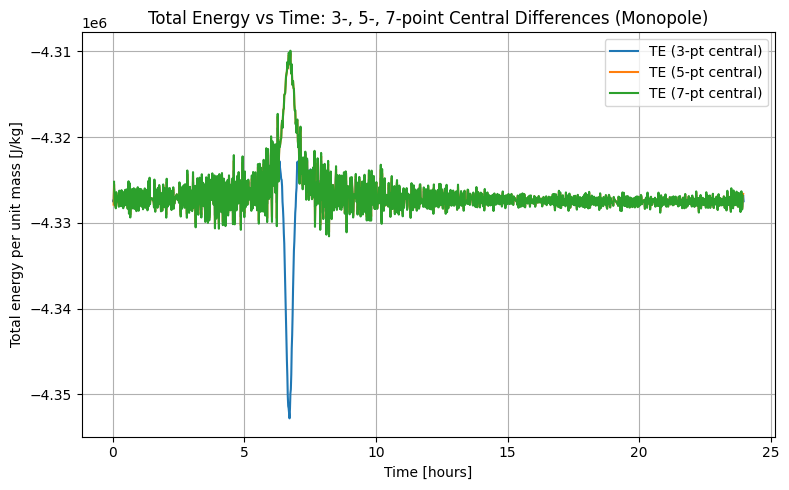

In [14]:
# ==== Task 3: Higher-order central differences (3-, 5-, 7-point) for velocity ====
# Goal: Plot Total Energy (TE = KE + PE) vs time using 3-, 5-, 7-point central stencils.

def estimate_dt_seconds(t_hours):
    """
    Estimate sampling interval (seconds) from time axis.
    Uses median to be robust to occasional irregularities or midnight wrap.
    """
    dt_h = np.diff(np.asarray(t_hours))
    # Keep only positive steps (guard against midnight wrap)
    dt_h = dt_h[dt_h > 0]
    return float(np.median(dt_h) * 3600.0)

def central_diff(arr, h, order):
    """
    Central finite-difference derivative with uniform spacing h (seconds).
    order ∈ {3,5,7} for 3-, 5-, 7-point stencils.
    Returns (v, k) where v is d(arr)/dt aligned to indices [k:-k] and k is half-width.
    """
    a = np.asarray(arr, dtype=float)
    if order == 3:
        k = 1
        v = (a[2:] - a[:-2]) / (2*h)
    elif order == 5:
        k = 2
        v = (-a[4:] + 8*a[3:-1] - 8*a[1:-3] + a[:-4]) / (12*h)
    elif order == 7:
        k = 3
        v = ( a[6:] - 9*a[5:-1] + 45*a[4:-2] - 45*a[2:-4] + 9*a[1:-5] - a[:-6]) / (60*h)
    else:
        raise ValueError("order must be one of {3,5,7}")
    return v, k

def energy_monopole_from_centered(t_hours, x_re, y_re, z_re, order):
    """
    Compute TE per unit mass using central difference of given order for velocity
    and φ = -μ/r (monopole). Aligns r with the centered derivative indices.
    Returns: t_c (hours), TE (J/kg)
    """
    # Convert to meters
    x = np.asarray(x_re) * RE_M
    y = np.asarray(y_re) * RE_M
    z = np.asarray(z_re) * RE_M

    # Estimated uniform step (s)
    h = estimate_dt_seconds(t_hours)

    # Velocity components (aligned to [k:-k])
    vx, kx = central_diff(x, h, order)
    vy, ky = central_diff(y, h, order)
    vz, kz = central_diff(z, h, order)
    # All k are equal for a given order; just use one
    k = kx

    # Align time and position magnitude to the centered window
    t_c = np.asarray(t_hours)[k:-k]
    r   = np.sqrt(x[k:-k]**2 + y[k:-k]**2 + z[k:-k]**2)

    # Energies per unit mass
    v2 = vx*vx + vy*vy + vz*vz
    KE = 0.5 * v2
    PE = -MU / r
    TE = KE + PE
    return t_c, TE

# --- Compute TE for 3-, 5-, 7-point stencils
t3, TE3 = energy_monopole_from_centered(t, x, y, z, order=3)
t5, TE5 = energy_monopole_from_centered(t, x, y, z, order=5)
t7, TE7 = energy_monopole_from_centered(t, x, y, z, order=7)

# --- Plot: TE vs time for all three stencils
plt.figure(figsize=(8,5))
plt.plot(t3, TE3, label='TE (3-pt central)')
plt.plot(t5, TE5, label='TE (5-pt central)')
plt.plot(t7, TE7, label='TE (7-pt central)')
plt.xlabel('Time [hours]')
plt.ylabel('Total energy per unit mass [J/kg]')
plt.title('Total Energy vs Time: 3-, 5-, 7-point Central Differences (Monopole)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


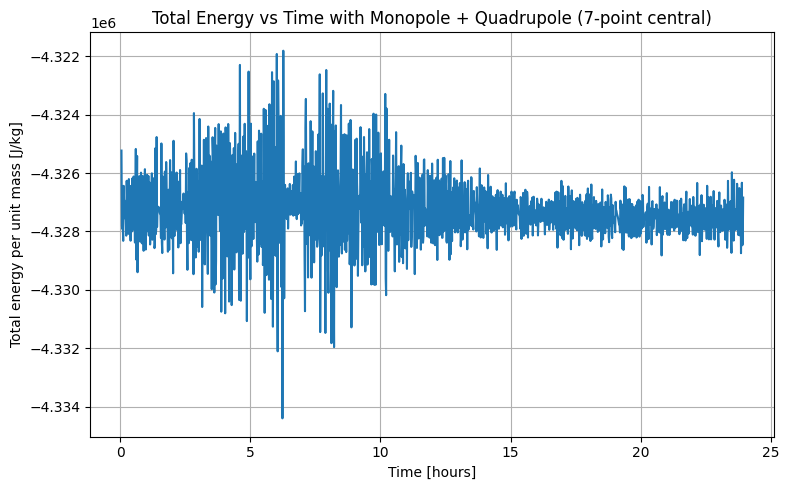

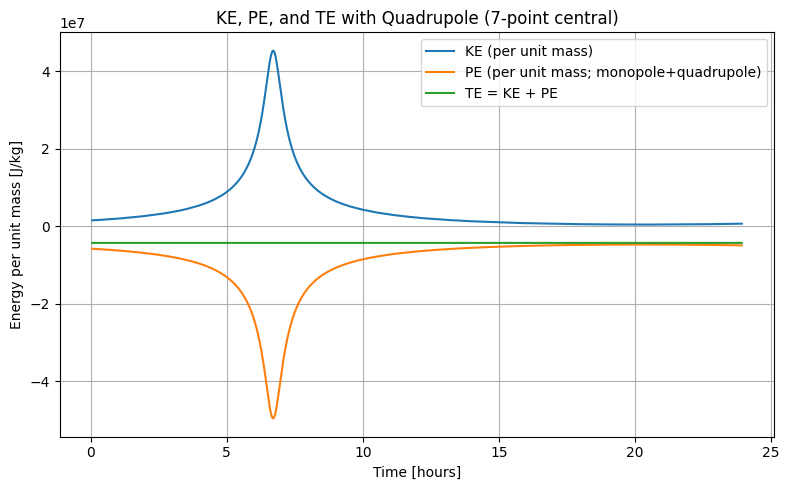

In [15]:
# ==== Task 4: Total energy with monopole + quadrupole (J2) potential ====
# Use a higher-order central stencil (5- or 7-point) for velocity, then KE+PE.

J2   = 1.75553e25                    # Quadrupole coefficient [m^5/s^2]

def estimate_dt_seconds(t_hours):
    """Robust estimate of sampling interval (seconds). Uses median; ignores nonpositive steps."""
    dt_h = np.diff(np.asarray(t_hours))
    dt_h = dt_h[dt_h > 0]
    return float(np.median(dt_h) * 3600.0)

def central_diff(arr, h, order):
    """
    Central finite-difference derivative with uniform spacing h (seconds).
    order ∈ {3,5,7}. Returns (dadt, k) where k is the half-width (1,2,3).
    """
    a = np.asarray(arr, dtype=float)
    if order == 3:
        k = 1
        dadt = (a[2:] - a[:-2]) / (2*h)
    elif order == 5:
        k = 2
        dadt = (-a[4:] + 8*a[3:-1] - 8*a[1:-3] + a[:-4]) / (12*h)
    elif order == 7:
        k = 3
        dadt = ( a[6:] - 9*a[5:-1] + 45*a[4:-2] - 45*a[2:-4] + 9*a[1:-5] - a[:-6]) / (60*h)
    else:
        raise ValueError("order must be one of {3,5,7}")
    return dadt, k

def energy_with_quadrupole(t_hours, x_re, y_re, z_re, order=7):
    """
    Compute total energy per unit mass using:
      - central difference of given 'order' for velocities
      - gravitational potential φ = -μ/r + (J2/(2 r^5)) (3 z^2 - r^2)
    Inputs: positions in Earth radii (RE); time in hours from start.
    Returns: (t_c, KE, PE, TE) with alignment [k:-k] where k depends on 'order'.
    Units: energies in J/kg (= m^2/s^2).
    """
    # positions -> meters
    x = np.asarray(x_re) * RE_M
    y = np.asarray(y_re) * RE_M
    z = np.asarray(z_re) * RE_M

    # uniform step (seconds) from time axis
    h = estimate_dt_seconds(t_hours)

    # centered velocities
    vx, k = central_diff(x, h, order)
    vy, _ = central_diff(y, h, order)
    vz, _ = central_diff(z, h, order)

    # align time & geometry to [k:-k]
    t_c = np.asarray(t_hours)[k:-k]
    x_c, y_c, z_c = x[k:-k], y[k:-k], z[k:-k]
    r = np.sqrt(x_c*x_c + y_c*y_c + z_c*z_c)

    # energies per unit mass
    v2 = vx*vx + vy*vy + vz*vz
    KE = 0.5 * v2
    # quadrupole potential (monopole + J2 term)
    PE = (-MU / r) + (J2 * (3.0*z_c*z_c - r*r)) / (2.0 * r**5)
    TE = KE + PE
    return t_c, KE, PE, TE

# --- Compute and plot (use 7-point by default; set order=5 if you prefer) ---
t4, KE4, PE4, TE4 = energy_with_quadrupole(t, x, y, z, order=7)

plt.figure(figsize=(8,5))
plt.plot(t4, TE4)
plt.xlabel('Time [hours]')
plt.ylabel('Total energy per unit mass [J/kg]')
plt.title('Total Energy vs Time with Monopole + Quadrupole (7-point central)')
plt.grid(True)
plt.tight_layout()
plt.show()

# (Optional) If you also want the KE/PE breakdown on one plot:
plt.figure(figsize=(8,5))
plt.plot(t4, KE4, label='KE (per unit mass)')
plt.plot(t4, PE4, label='PE (per unit mass; monopole+quadrupole)')
plt.plot(t4, TE4, label='TE = KE + PE')
plt.xlabel('Time [hours]')
plt.ylabel('Energy per unit mass [J/kg]')
plt.title('KE, PE, and TE with Quadrupole (7-point central)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
